In [59]:
# Default Library
import  pandas   as pd
import  numpy    as np

# Biblioteca gráfica
import  plotly.express  as px
import  seaborn         as sns

pd.set_option("mode.chained_assignment", None)

In [2]:
heart_df = pd.read_csv("dataset/heart.csv", sep = ',', encoding = "utf-8")
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Análise de dados

In [3]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [30]:
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [31]:
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Análise de Variáveis

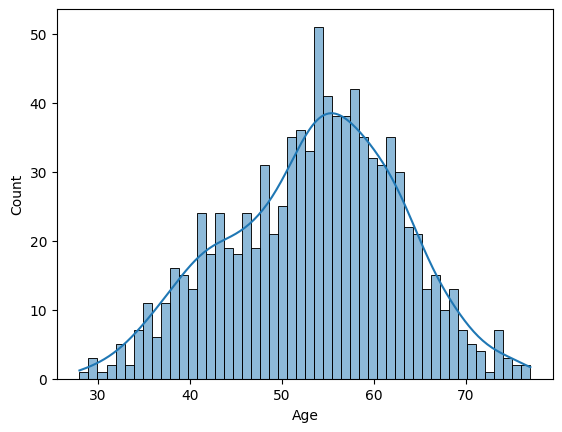

In [4]:
# Distribuição de idade
sns.histplot(heart_df, x = 'Age', bins = 50, kde = True);

In [5]:
# Distribuição de gênero
heart_df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

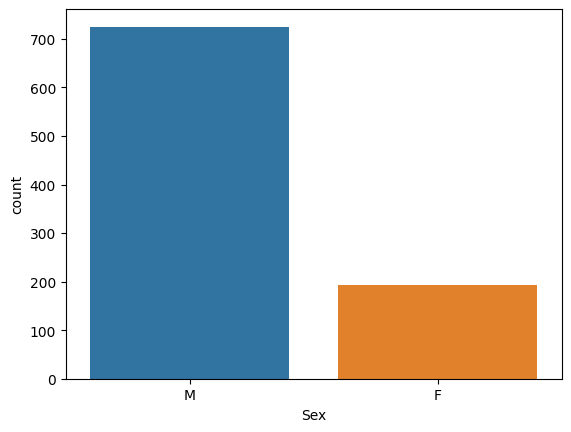

In [6]:
sns.countplot(x = 'Sex', data = heart_df);

In [7]:
# Chest Pain Type: Tipos de dor no peito
# ASY: assintomático
# NAP: dor não anginosa
# ATA: angina atípica
# TA: angina típica
# angina: dor no peito causada pela diminuição do fluxo de sangue no coração

heart_df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

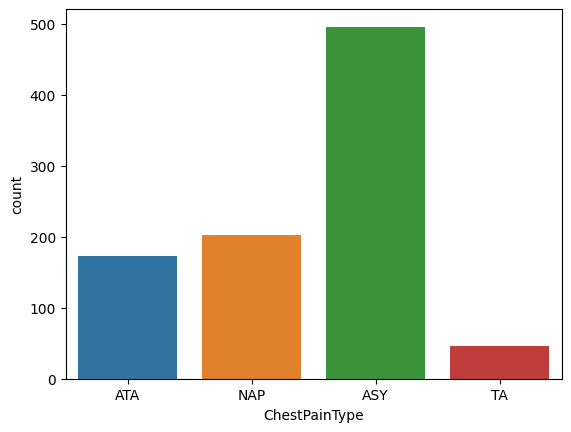

In [8]:
sns.countplot(x = 'ChestPainType', data = heart_df);

In [9]:
# Resting BP: pressão sanguínea em repouso em mmHg(sistólica)
heart_df['RestingBP'].value_counts().sort_index()

RestingBP
0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: count, Length: 67, dtype: int64

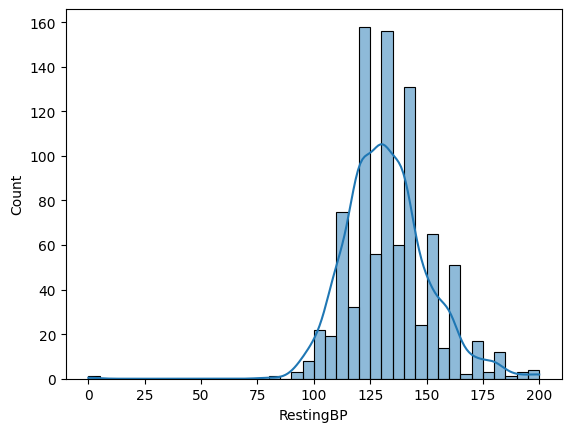

In [10]:
sns.histplot(heart_df, x = 'RestingBP', bins = 40, kde = True);

In [11]:
# Cholesterol = colesterol sérico (mg/dl)
heart_df['Cholesterol'].value_counts().sort_index()

Cholesterol
0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: count, Length: 222, dtype: int64

<Axes: xlabel='Cholesterol', ylabel='Count'>

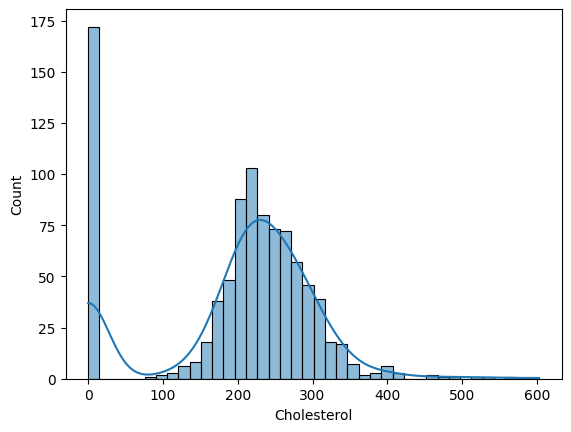

In [12]:
sns.histplot(heart_df, x = 'Cholesterol', bins = 40, kde = True)

In [13]:
# Fasting BS (blood sugar) = açúcar no sangue em jejum (mg/dl)
# 0: Fasting BS < 120 mg/dl (não diabético)
# 1: Fasting BS > 120 mg/dl (diabético)

heart_df['FastingBS'].value_counts()

FastingBS
0    704
1    214
Name: count, dtype: int64

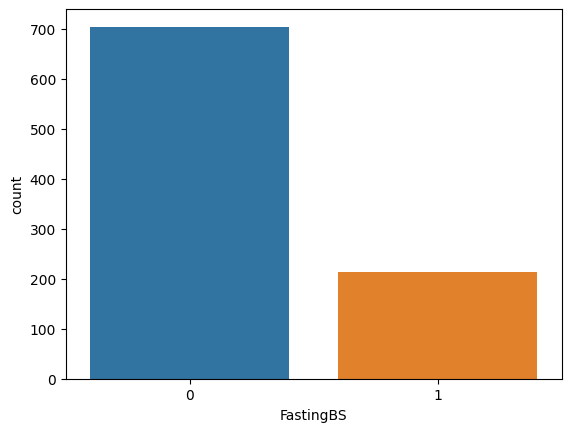

In [14]:
sns.countplot(x = 'FastingBS', data = heart_df);

In [15]:
# Resting ECG = eletrocardiograma em repouso
# normal
# LVH = Hipertrofia Ventricular Esquerda
# ST = Anormalidade da onda ST-T
heart_df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

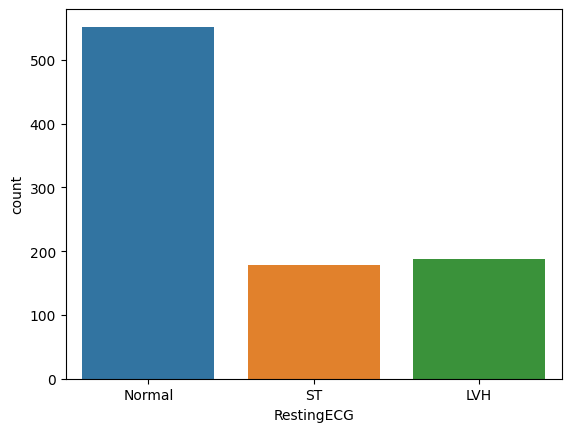

In [16]:
sns.countplot(x = 'RestingECG', data = heart_df);

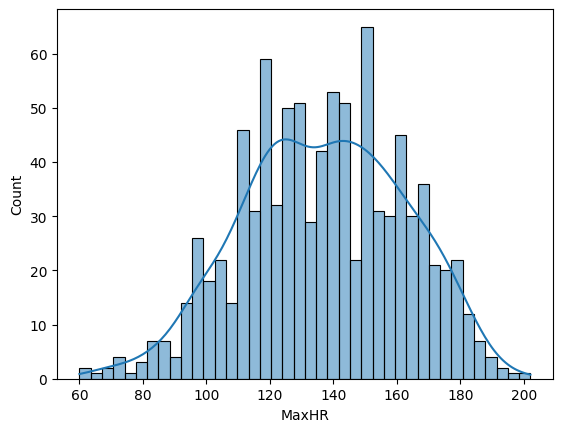

In [17]:
# Max HR (heart rate) = frequência cardíaca máxima
sns.histplot(heart_df, x = 'MaxHR', bins = 40, kde = True);

In [18]:
# Execise Angina = Angina induzida por exercício
heart_df['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [26]:
px.pie(heart_df,'ExerciseAngina')

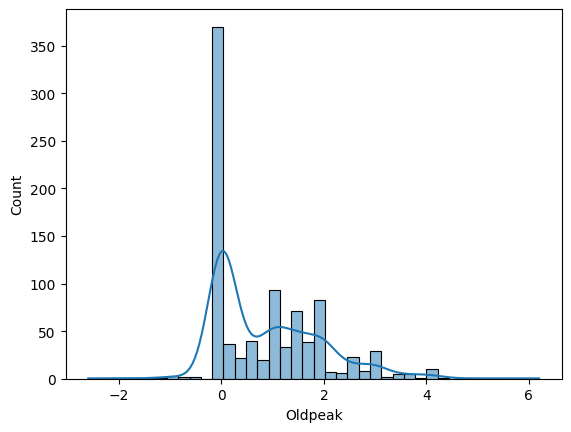

In [21]:
# Old Peak = Depressão de ST (referência no ECG) induzida por exercício em relação ao repouso
sns.histplot(heart_df, x = 'Oldpeak', bins = 40, kde =True);

In [22]:
# ST_Slope = Inclinação do segmento ST no ECG
# Flat = Plano
# Up = para cima
# Down = para baixo
heart_df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [23]:
px.pie(heart_df, 'ST_Slope')

In [28]:
# Heart Disease = Doença Cardíaca
# 0: Não possui doença cardíaca
# 1: Possui doença cardíaca
heart_df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [29]:
px.pie(heart_df, 'HeartDisease')

### Tratando variáveis incoerentes

In [54]:
# Excluindo registros com pressão zero
heart_df2 = heart_df.loc[heart_df.RestingBP != 0]
print(heart_df.shape)
print(heart_df2.shape)

(918, 12)
(917, 12)


In [66]:
# substituindo valores zerados de colesterol pela média
heart_df2.Cholesterol.replace(0, np.NaN, inplace = True)
print("Média do colesterol tendo valores zerados: %.3f" % heart_df.Cholesterol.mean())
print("Média do colesterol sem valores zerados: %.3f" % heart_df2.Cholesterol.mean())

# Substitui os valores MISSING pela média
heart_df2['Cholesterol'].fillna(heart_df2.Cholesterol.mean(), inplace = True)

Média do colesterol tendo valores zerados: 198.800
Média do colesterol sem valores zerados: 244.635


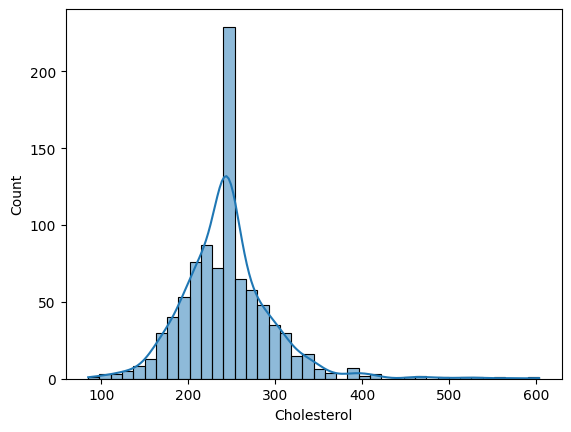

In [68]:
sns.histplot(heart_df2, x = 'Cholesterol', bins = 40, kde = True);

### Análise de outliers

In [69]:
px.box(heart_df2, y = 'Age')

In [71]:
px.box(heart_df2, y = 'RestingBP')

In [72]:
px.box(heart_df2, y = 'Cholesterol')

In [73]:
px.box(heart_df2, y = 'MaxHR')

In [74]:
heart_df2.to_csv('dataset/heart_tratado.csv', sep = ';', encoding = 'utf-8', index = False)